In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [153]:
obj_colors = {
    'circle': sns.color_palette("Set2")[0], 
    'weird': sns.color_palette("Set2")[1], 
    'triangle': sns.color_palette("Set2")[2], 
    'tentacle': sns.color_palette("Set2")[3]
}

# Objects

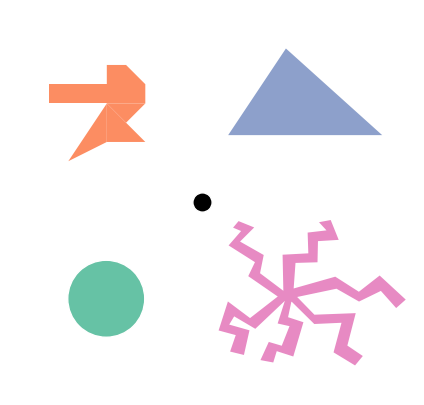

In [194]:
import sys
sys.path.append('../.')

from shapely.affinity import translate
from shapely.affinity import affine_transform
from shapely.geometry import Polygon, MultiPolygon
from matplotlib.patches import Circle
from research_envs.path_planning.descartes_mod.patch import PolygonPatch

sns.set_style("white")

x_rng = [0, 42]
y_rng = [0, 40]

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal') 

# print(obs)
ax.add_patch(Circle((20, 20), 1, facecolor='black'))

# Circle: 
ax.add_patch(Circle((10, 10), 4, facecolor=obj_colors['circle']))

aux_poly = Polygon([(94.734375, 83.984375), (90.20703125, 62.62890625), (110.1171875, 56.09375), (96.9765625, 11.61328125), (75.48828125, 18.5390625), (70.95703125, 3.8203125), (54.3515625, 6.91015625), (65.16796875, 30.51171875), (81.9921875, 25.5546875), (92.08984375, 50.99609375), (76.671875, 54.453125), (86.0234375, 83.84765625), (47.640625, 47.55078125), (20.203125, 63.72265625), (13.75390625, 53.02734375), (40.0859375, 45.57421875), (32.875, 13.60546875), (14.92578125, 17.984375), (22.2578125, 39.3828125), (0.0, 45.390625), (12.0703125, 83.046875), (40.81640625, 61.47265625), (76.80078125, 89.47265625), (38.49609375, 115.92578125), (47.20703125, 134.125), (12.984375, 155.828125), (29.21875, 174.5390625), (18.79296875, 178.91796875), (25.90625, 187.40234375), (46.1953125, 179.1875), (27.828125, 160.86328125), (58.55078125, 143.390625), (53.79296875, 119.71875), (84.07421875, 96.92578125), (83.08984375, 143.7734375), (116.51953125, 145.55859375), (115.62109375, 172.51953125), (140.1171875, 175.375), (130.3671875, 185.984375), (145.5625, 188.83203125), (155.9453125, 163.05859375), (129.0234375, 161.40625), (128.41796875, 133.9453125), (99.84765625, 133.12109375), (97.44921875, 99.9140625), (151.49609375, 115.25), (182.1640625, 95.65625), (209.14453125, 116.73828125), (242.98828125, 85.5), (230.57421875, 74.515625), (210.734375, 96.77734375), (182.34765625, 82.95703125), (153.0703125, 99.62890625), (102.01171875, 88.890625), (124.3984375, 65.859375), (178.0625, 67.89453125), (167.19140625, 25.765625), (187.2734375, 12.2109375), (177.1796875, 0.0), (149.2890625, 16.94921875), (159.61328125, 55.39453125), (124.22265625, 53.78515625), (93.7734375, 83.88671875)])
scale_factor = 0.08
aux_poly = affine_transform(aux_poly, (scale_factor, 0, 0, scale_factor, 0, 0))
centroid = aux_poly.centroid
ax.add_patch(PolygonPatch(translate(aux_poly, xoff=30-centroid.x, yoff=10-centroid.y), linewidth=0, facecolor=obj_colors['tentacle']))

c = obj_colors['weird']
aux_l = [[[0, 0], [0, 4], [2, 4], [4, 2], [4, 0]],
[[0, 0], [0, 2], [-6, 2], [-6, 0]],
[[0, 0], [-4, -6], [0, -4]],
[[0, 0], [0, -4], [4, -4]],
[[0, 0], [2, -2], [4, 0]]]
aux_poly = MultiPolygon([(vertices, []) for vertices in aux_l])
centroid = aux_poly.centroid
for v in aux_l:
    ax.add_patch(PolygonPatch(translate(Polygon(v), xoff=10-centroid.x, yoff=30-centroid.y), linewidth=0, facecolor=c))

aux_poly = Polygon([[0, 0], [6, 9], [16, 0]])
centroid = aux_poly.centroid
ax.add_patch(PolygonPatch(translate(aux_poly, xoff=30-centroid.x, yoff=30-centroid.y), linewidth=0, facecolor=obj_colors['triangle']))

ax.set_xlim(x_rng[0], x_rng[1])
ax.set_ylim(y_rng[0], y_rng[1])
plt.axis('off')
plt.savefig('PositionControl/images/objects.png',bbox_inches='tight')
plt.show()

In [195]:
df_l = []
for o in ['circle', 'weird', 'triangle', 'tentacle']:
    aux_df = pd.read_csv('PositionControl/sac_{}_train.csv'.format(o))
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

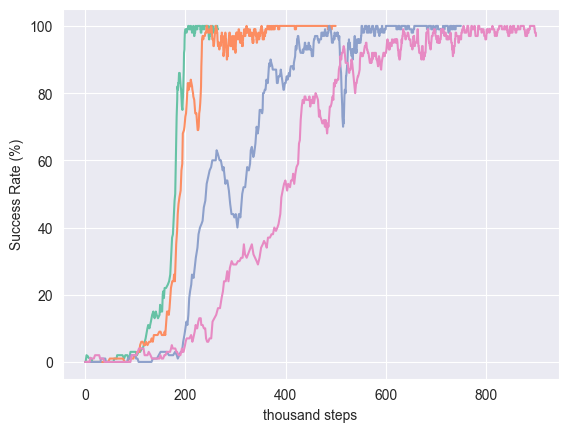

In [199]:
aux_df = df
aux_df['thousand steps'] = aux_df['Step']/ 1e3
aux_df['Success Rate (%)'] = 100*aux_df['Value']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='thousand steps', y='Success Rate (%)', hue='object',  palette=obj_colors, legend=None)
plt.savefig('PositionControl/images/training_curves.png',bbox_inches='tight')

# Metrics

In [209]:
# Filter the non successes to plot the metrics

In [210]:
sns.set_style("darkgrid")
df_l = []
for o in ['circle', 'weird', 'triangle', 'tentacle']:
    aux_df = pd.read_csv('PositionControl/evaluation/sac_{}.csv'.format(o))
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

In [211]:
df['corridor_width'] = 2*df['corridor_width']

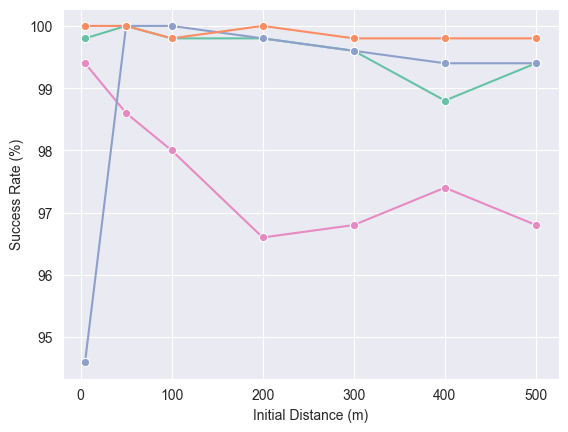

In [218]:
aux_df = df.groupby(['object','init_distance']).apply(lambda x: x['success'].mean()).reset_index(level=[0,1])
aux_df['Success Rate (%)'] = aux_df[0]*100
aux_df['Initial Distance (m)'] = aux_df['init_distance']
sns.lineplot(aux_df, x='Initial Distance (m)', y='Success Rate (%)', hue='object', palette=obj_colors, marker='o', legend=None)
plt.savefig('PositionControl/images/success_rate.png',bbox_inches='tight')

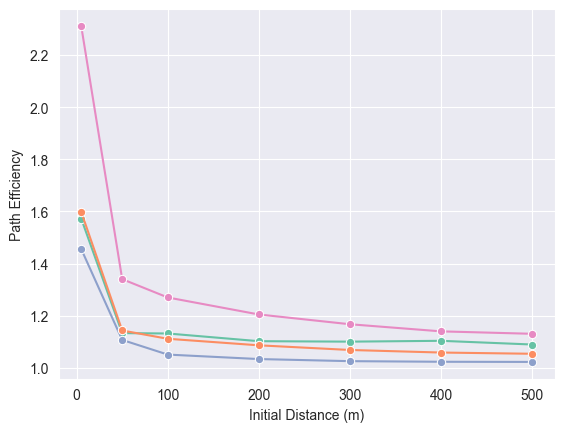

In [219]:
aux_df = df[df['success']]
aux_df = df.groupby(['object','init_distance']).apply(lambda x: x['trajectory_efficiency'].mean()).reset_index(level=[0,1])
aux_df['Path Efficiency'] = aux_df[0]
aux_df['Initial Distance (m)'] = aux_df['init_distance']
sns.lineplot(aux_df, x='Initial Distance (m)', y='Path Efficiency', hue='object', palette=obj_colors, marker='o', legend=None)
plt.savefig('PositionControl/images/path_efficiency.png',bbox_inches='tight')

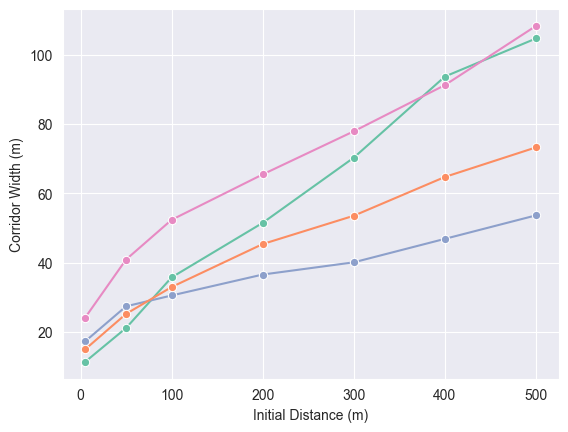

In [221]:
aux_df = df[df['success']]
aux_df = df.groupby(['object','init_distance']).apply(lambda x: x['corridor_width'].mean()).reset_index(level=[0,1])
aux_df['Corridor Width (m)'] = aux_df[0]
aux_df['Initial Distance (m)'] = aux_df['init_distance']
sns.lineplot(aux_df, x='Initial Distance (m)', y='Corridor Width (m)', hue='object', palette=obj_colors, marker='o', legend=None)
plt.savefig('PositionControl/images/corridor_width.png',bbox_inches='tight')

<ErrorbarContainer object of 3 artists>

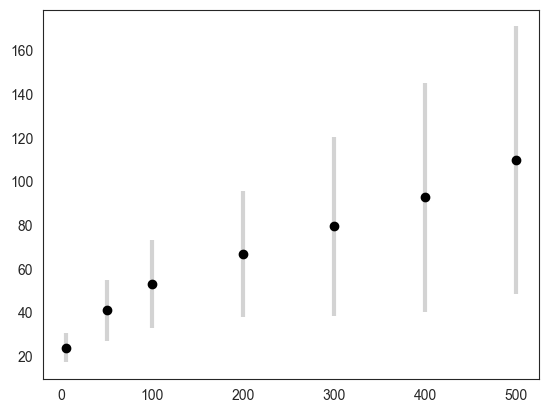

In [171]:
sns.set_style("white")
aux_df = df[df['success']]
aux_df = aux_df[aux_df['object'] == 'tentacle']
aux_df['corridor_width']
aux_df = aux_df.groupby('init_distance').apply(lambda x: x['corridor_width'].mean())
x = list(aux_df.index)
y = list(aux_df.values)
dy = list(df.groupby('init_distance').apply(lambda x: x['corridor_width'].std()))
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)

<ErrorbarContainer object of 3 artists>

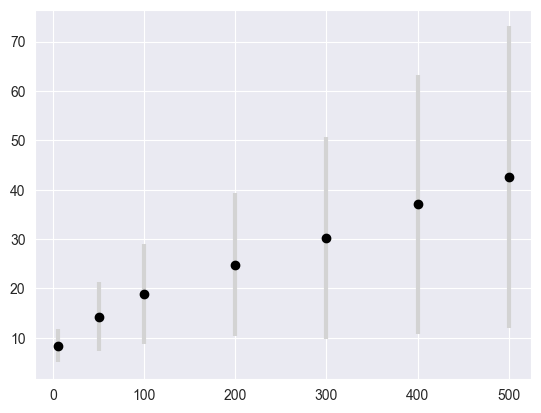

In [140]:
aux_df = df.groupby('init_distance').apply(lambda x: x['corridor_width'].mean())
x = list(aux_df.index)
y = list(aux_df.values)
dy = list(df.groupby('init_distance').apply(lambda x: x['corridor_width'].std()))
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)

In [ ]:
# Success rate plot

# Tentacle n runs

In [202]:
df_l = []
for i in [2,3,4]:
    aux_df = pd.read_csv('PositionControl/evaluation/tentacle_runs/sac_tentacle_{}.csv'.format(i))
    aux_df['run_i'] = i
    df_l.append(aux_df)
df = pd.concat(df_l)

<Axes: xlabel='init_distance', ylabel='0'>

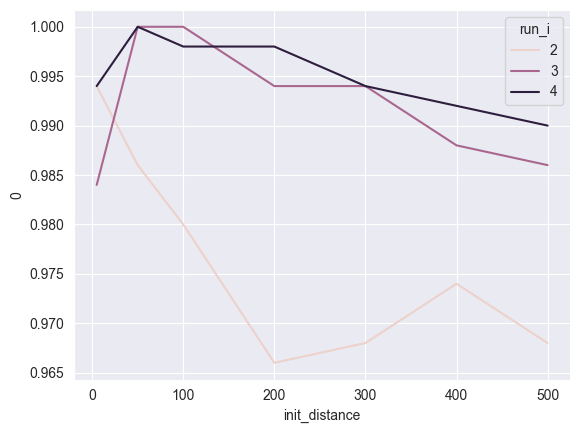

In [205]:
aux_df = df.groupby(['run_i','init_distance']).apply(lambda x: x['success'].mean()).reset_index(level=[0,1])
sns.lineplot(aux_df, x='init_distance', y=0, hue='run_i')

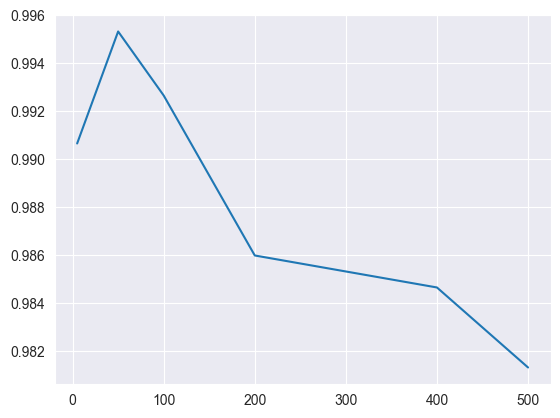

In [208]:
plt.plot(aux_df.groupby('init_distance').apply(lambda x: x[0].mean()))